<font size=3><strong>Step 1 : Import necessary libraries</strong></font>

In [33]:
# Ignore printing all warnings
!pip install pyfolio
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyfolio as pf
import datetime as dt
import pandas_datareader.data as web
import os
import warnings
warnings.filterwarnings('ignore')

# print all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [102]:

df = pd.read_csv('/content/BLUEDART.csv')
df_1 = pd.read_csv('/content/BLUEDART.csv')

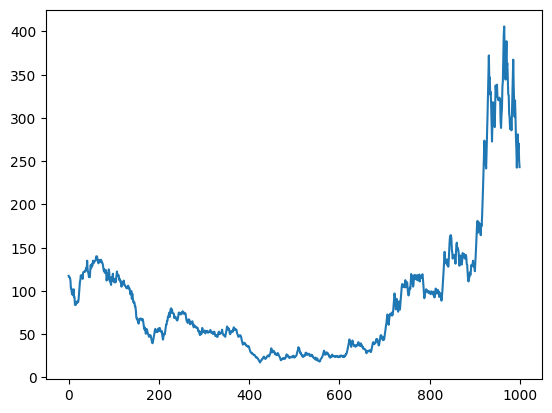

In [103]:
plt.plot(df['Close'][:1000])

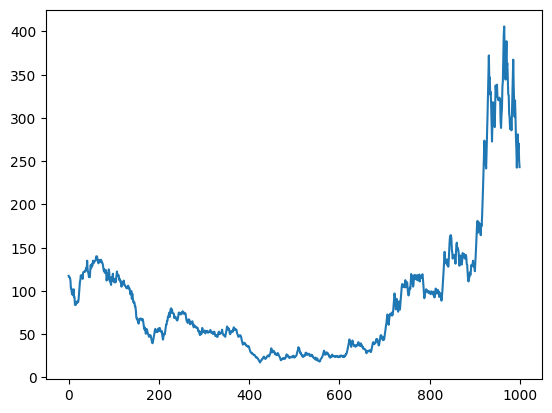

In [104]:
plt.plot(df_1['Close'][:1000])

In [105]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,BLUEDART,EQ,114.00,115.0,118.00,115.00,NaN,117.50,115.38,1300,1.499950e+10,NaN,NaN,NaN
1,1996-01-02,BLUEDART,EQ,117.50,117.5,119.00,115.00,NaN,116.00,116.87,1600,1.869900e+10,NaN,NaN,NaN
2,1996-01-03,BLUEDART,EQ,116.00,116.0,116.05,115.05,NaN,116.00,115.78,400,4.631000e+09,NaN,NaN,NaN
3,1996-01-04,BLUEDART,EQ,116.00,116.0,116.95,115.00,NaN,115.00,116.14,600,6.968500e+09,NaN,NaN,NaN
4,1996-01-05,BLUEDART,EQ,115.00,113.5,113.50,112.00,NaN,112.00,112.63,400,4.505000e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6269,2021-06-25,BLUEDART,EQ,5835.10,5882.0,5910.70,5820.00,5842.0,5848.90,5854.33,20034,1.172856e+13,4837.0,11117.0,0.5549
6270,2021-06-28,BLUEDART,EQ,5848.90,5865.0,5885.80,5680.00,5732.0,5733.30,5771.92,28996,1.673625e+13,6927.0,15062.0,0.5195
6271,2021-06-29,BLUEDART,EQ,5733.30,5777.7,5850.00,5746.80,5850.0,5799.55,5790.54,37727,2.184597e+13,3777.0,29714.0,0.7876
6272,2021-06-30,BLUEDART,EQ,5799.55,5856.9,5920.00,5769.80,5810.0,5797.15,5846.99,30859,1.804322e+13,5390.0,17060.0,0.5528


In [106]:
df['bnh_returns'] = np.log(df['Close']/df['Close'].shift(1))
df.head(3)
df_1['bnh_returns'] = np.log(df_1['Close']/df_1['Close'].shift(1))
df_1.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,bnh_returns
0,1996-01-01,BLUEDART,EQ,114.0,115.0,118.00,115.00,NaN,117.5,115.38,1300,1.499950e+10,NaN,NaN,NaN,NaN
1,1996-01-02,BLUEDART,EQ,117.5,117.5,119.00,115.00,NaN,116.0,116.87,1600,1.869900e+10,NaN,NaN,NaN,-0.012848
2,1996-01-03,BLUEDART,EQ,116.0,116.0,116.05,115.05,NaN,116.0,115.78,400,4.631000e+09,NaN,NaN,NaN,0.000000


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,bnh_returns
0,1996-01-01,BLUEDART,EQ,114.0,115.0,118.00,115.00,NaN,117.5,115.38,1300,1.499950e+10,NaN,NaN,NaN,NaN
1,1996-01-02,BLUEDART,EQ,117.5,117.5,119.00,115.00,NaN,116.0,116.87,1600,1.869900e+10,NaN,NaN,NaN,-0.012848
2,1996-01-03,BLUEDART,EQ,116.0,116.0,116.05,115.05,NaN,116.0,115.78,400,4.631000e+09,NaN,NaN,NaN,0.000000


In [107]:
# creating bollinger band indicators
df['ma20'] = df['Close'].rolling(window=20).mean()
df['std'] = df['Close'].rolling(window=20).std()
df['upper_band'] = df['ma20'] + (2 * df['std'])
df['lower_band'] = df['ma20'] - (2 * df['std'])
df.drop(['Open','High','Low'],axis=1,inplace=True,errors='ignore')
df.tail(5)
df_1['ma20'] = df_1['Close'].rolling(window=20).mean()
df_1['std'] = df_1['Close'].rolling(window=20).std()
df_1['upper_band'] = df_1['ma20'] + (2 * df_1['std'])
df_1['lower_band'] = df_1['ma20'] - (2 * df_1['std'])
df_1.drop(['Open','High','Low'],axis=1,inplace=True,errors='ignore')
df_1.tail(5)

,Date,Symbol,Series,Prev Close,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,bnh_returns,ma20,std,upper_band,lower_band
6269,2021-06-25,BLUEDART,EQ,5835.10,5842.0,5848.90,5854.33,20034,1.172856e+13,4837.0,11117.0,0.5549,0.002362,5902.6325,131.848953,6166.330406,5638.934594
6270,2021-06-28,BLUEDART,EQ,5848.90,5732.0,5733.30,5771.92,28996,1.673625e+13,6927.0,15062.0,0.5195,-0.019962,5888.6650,134.353541,6157.372082,5619.957918
6271,2021-06-29,BLUEDART,EQ,5733.30,5850.0,5799.55,5790.54,37727,2.184597e+13,3777.0,29714.0,0.7876,0.011489,5878.2100,132.650222,6143.510445,5612.909555
6272,2021-06-30,BLUEDART,EQ,5799.55,5810.0,5797.15,5846.99,30859,1.804322e+13,5390.0,17060.0,0.5528,-0.000414,5864.5725,125.746526,6116.065552,5613.079448
6273,2021-07-01,BLUEDART,EQ,5797.15,5834.0,5807.10,5850.06,21325,1.247525e+13,3839.0,12129.0,0.5688,0.001715,5851.9250,117.501184,6086.927368,5616.922632


,Date,Symbol,Series,Prev Close,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,bnh_returns,ma20,std,upper_band,lower_band
6269,2021-06-25,BLUEDART,EQ,5835.10,5842.0,5848.90,5854.33,20034,1.172856e+13,4837.0,11117.0,0.5549,0.002362,5902.6325,131.848953,6166.330406,5638.934594
6270,2021-06-28,BLUEDART,EQ,5848.90,5732.0,5733.30,5771.92,28996,1.673625e+13,6927.0,15062.0,0.5195,-0.019962,5888.6650,134.353541,6157.372082,5619.957918
6271,2021-06-29,BLUEDART,EQ,5733.30,5850.0,5799.55,5790.54,37727,2.184597e+13,3777.0,29714.0,0.7876,0.011489,5878.2100,132.650222,6143.510445,5612.909555
6272,2021-06-30,BLUEDART,EQ,5799.55,5810.0,5797.15,5846.99,30859,1.804322e+13,5390.0,17060.0,0.5528,-0.000414,5864.5725,125.746526,6116.065552,5613.079448
6273,2021-07-01,BLUEDART,EQ,5797.15,5834.0,5807.10,5850.06,21325,1.247525e+13,3839.0,12129.0,0.5688,0.001715,5851.9250,117.501184,6086.927368,5616.922632


In [108]:
# BUY condition
df['signal'] = np.where( (df['Close'] < df['lower_band']) &
                          (df['Close'].shift(1) >= df['lower_band']),1,0)

# SELL condition
df['signal'] = np.where( (df['Close'] > df['upper_band']) &
                          (df['Close'].shift(1) <= df['upper_band']),-1,df['signal'])
# creating long and short positions
df['position'] = df['signal'].replace(to_replace=0, method='ffill')
df['position'] = df['position'].shift(1)
df['strategy_returns'] = df['bnh_returns'] * (df['position'])

df.tail(5)
df_1['signal'] = np.where( (df_1['Close'] < df_1['lower_band']) &
                          (df_1['Close'].shift(1) >= df_1['lower_band']),1,0)

# SELL condition
df_1['signal'] = np.where( (df_1['Close'] > df_1['upper_band']) &
                          (df_1['Close'].shift(1) <= df_1['upper_band']),-1,df_1['signal'])
# creating long and short positions
df_1['position'] = df_1['signal'].replace(to_replace=0, method='ffill')
df_1['position'] = df_1['position'].shift(1)
df_1['strategy_returns'] = df_1['bnh_returns'] * (df_1['position'])

df_1.tail(5)

,Date,Symbol,Series,Prev Close,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,bnh_returns,ma20,std,upper_band,lower_band,signal,position,strategy_returns
6269,2021-06-25,BLUEDART,EQ,5835.10,5842.0,5848.90,5854.33,20034,1.172856e+13,4837.0,11117.0,0.5549,0.002362,5902.6325,131.848953,6166.330406,5638.934594,0,1.0,0.002362
6270,2021-06-28,BLUEDART,EQ,5848.90,5732.0,5733.30,5771.92,28996,1.673625e+13,6927.0,15062.0,0.5195,-0.019962,5888.6650,134.353541,6157.372082,5619.957918,0,1.0,-0.019962
6271,2021-06-29,BLUEDART,EQ,5733.30,5850.0,5799.55,5790.54,37727,2.184597e+13,3777.0,29714.0,0.7876,0.011489,5878.2100,132.650222,6143.510445,5612.909555,0,1.0,0.011489
6272,2021-06-30,BLUEDART,EQ,5799.55,5810.0,5797.15,5846.99,30859,1.804322e+13,5390.0,17060.0,0.5528,-0.000414,5864.5725,125.746526,6116.065552,5613.079448,0,1.0,-0.000414
6273,2021-07-01,BLUEDART,EQ,5797.15,5834.0,5807.10,5850.06,21325,1.247525e+13,3839.0,12129.0,0.5688,0.001715,5851.9250,117.501184,6086.927368,5616.922632,0,1.0,0.001715


,Date,Symbol,Series,Prev Close,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,bnh_returns,ma20,std,upper_band,lower_band,signal,position,strategy_returns
6269,2021-06-25,BLUEDART,EQ,5835.10,5842.0,5848.90,5854.33,20034,1.172856e+13,4837.0,11117.0,0.5549,0.002362,5902.6325,131.848953,6166.330406,5638.934594,0,1.0,0.002362
6270,2021-06-28,BLUEDART,EQ,5848.90,5732.0,5733.30,5771.92,28996,1.673625e+13,6927.0,15062.0,0.5195,-0.019962,5888.6650,134.353541,6157.372082,5619.957918,0,1.0,-0.019962
6271,2021-06-29,BLUEDART,EQ,5733.30,5850.0,5799.55,5790.54,37727,2.184597e+13,3777.0,29714.0,0.7876,0.011489,5878.2100,132.650222,6143.510445,5612.909555,0,1.0,0.011489
6272,2021-06-30,BLUEDART,EQ,5799.55,5810.0,5797.15,5846.99,30859,1.804322e+13,5390.0,17060.0,0.5528,-0.000414,5864.5725,125.746526,6116.065552,5613.079448,0,1.0,-0.000414
6273,2021-07-01,BLUEDART,EQ,5797.15,5834.0,5807.10,5850.06,21325,1.247525e+13,3839.0,12129.0,0.5688,0.001715,5851.9250,117.501184,6086.927368,5616.922632,0,1.0,0.001715


In [109]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Last                   495
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                3773
Deliverable Volume    1433
%Deliverble           1433
bnh_returns              1
ma20                    19
std                     19
upper_band              19
lower_band              19
signal                   0
position                 1
strategy_returns         1
dtype: int64

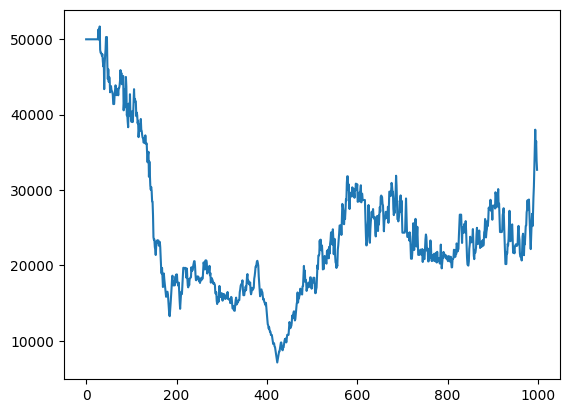

In [113]:
# plt.plot(df['strategy_returns'].cumsum()*100000)
# Initial capital
initial_capital = 50000

# Initialize capital
capital = initial_capital

# List to store net worth at each time step
net_worth = []
# Iterate over each row
# df.dropna(inplace = True)
for i in range(1,1000):   # Update capital based on strategy returns
    if (df['signal'].iloc[i] == 1):
      capital += df['strategy_returns'].iloc[i] * capital
    if (df['signal'].iloc[i] == 0):
      capital += df['strategy_returns'].iloc[i] * capital

    # Append net worth to the list
    net_worth.append(capital)

# Add net worth column to the DataFrame
# df['net_worth'] = net_worth

# Print the last few rows of the DataFrame
# print(df)
plt.plot(net_worth)

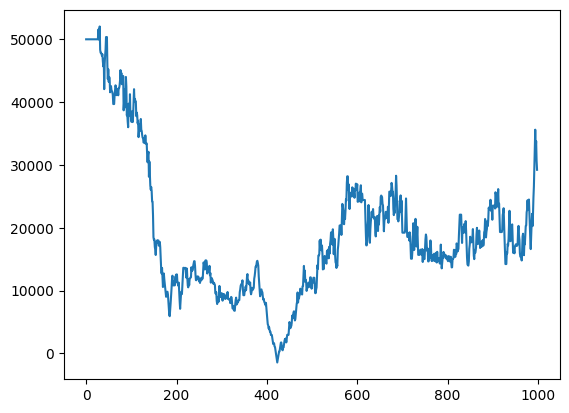

In [114]:
initial_capital = 50000

# Initialize capital
capital = initial_capital

# List to store net worth at each time step
net_worth1 = []
# Iterate over each row
df['strategy_returns'].dropna(inplace = True)
for i in range(1,1000):   # Update capital based on strategy returns
    if (df_1['signal'].iloc[i] == 1):
      capital += df_1['strategy_returns'].iloc[i] * (capital+10000)
    if (df_1['signal'].iloc[i] == 0):
      capital += df_1['strategy_returns'].iloc[i] * (capital+10000)

    # Append net worth to the list
    net_worth1.append(capital)
    # print(capital)
# Add net worth column to the DataFrame
# df['net_worth'] = net_worth

# Print the last few rows of the DataFrame
# print(df_1)
plt.plot(net_worth1)

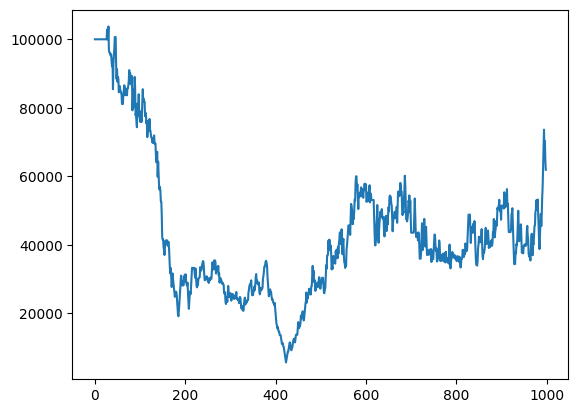

In [115]:
net_worth = np.array(net_worth)
net_worth1 = np.array(net_worth1)
net_worth+=net_worth1
plt.plot(net_worth)
np.save('BB.npy',net_worth)